In [ ]:
import numpy as np
import scipy.io as sio
%matplotlib notebook
import os
import h5py
import sklearn.linear_model as slm
import matplotlib.pyplot as plt
from scipy import linalg
import scipy.ndimage.filters as sfi

In [ ]:
stimfoldname = '/home/mossing/excitation/visual_stim/170802/M7194/'
filebase = 'M7194_000_000'
matfile = sio.loadmat(stimfoldname+filebase+'.mat',squeeze_me=True)

In [ ]:
foldname = '/home/mossing/excitation/2P/170802/M7194/'
os.chdir(foldname)
matfile = sio.loadmat(foldname+'trialwise.mat')
trialwise = matfile['trialwise']
ori = matfile['ori'][0]
contrast = matfile['contrast'][0]
gcontrast = matfile['gcontrast'][0]
oriU = np.unique(ori)
gcU = np.unique(gcontrast)
cU = np.unique(contrast)
t = np.arange(trialwise.shape[-1])/15.5

In [ ]:
def zscore(trialwise):
    arr = trialwise.reshape((trialwise.shape[0],trialwise.shape[1]*trialwise.shape[2]))
    arr = (arr-arr.mean(1)[:,np.newaxis])/arr.std(1)[:,np.newaxis]
    return arr.reshape(trialwise.shape)

In [ ]:
def print_multipage(t,arr,fn,filename):
    from matplotlib.backends.backend_pdf import PdfPages
    plt.close()
    with PdfPages(filename+'.pdf') as pdf:
        for i in range(arr.shape[0]):
            fn(t,arr[i])
            pdf.savefig()
            plt.close()

In [ ]:
def sortbymultiple(variables):
    N = len(variables)
    fieldnames = ['a'*(i+1) for i in range(N)]
    xtype = np.dtype([(name,var.dtype) for name,var in zip(fieldnames,variables)])
    x = np.empty((variables[0].shape[0],),dtype=xtype)
    for i in range(N):
        x[fieldnames[i]] = variables[i]
    return np.argsort(x,order=tuple(fieldnames))

In [ ]:
def shapeup(arr,variables):
    x = sortbymultiple(variables)
    star = tuple([len(np.unique(var)) for var in variables])
    return arr[:,x].reshape((arr.shape[0],)+star+(-1,)+(arr.shape[-1],))

In [ ]:
zs = zscore(trialwise)

In [ ]:
trialwise.shape

In [ ]:
Zs = shapeup(zs,[contrast,gcontrast,ori])

In [ ]:
peakinds = np.argmax(sfi.gaussian_filter(Zs[:,1,1],sigma=(0,0,0,2)).mean(1).mean(1),axis=1)
order_by_peak = np.argsort(peakinds)
peaksort = peakinds[order_by_peak]

In [ ]:
gd = np.logical_and(2*Zs[order_by_peak,0,0].mean(1).mean(1).max(1)>Zs[order_by_peak,0,1].mean(1).mean(1).max(1),2*Zs[order_by_peak,0,0].mean(1).mean(1).max(1)<Zs[order_by_peak,1,0].mean(1).mean(1).max(1))

In [ ]:
isresponsive.shape

In [ ]:
plt.subplot(1,4,1)
plt.imshow(Zs[order_by_peak[gd],0,0].mean(1).mean(1),cmap=plt.cm.viridis,vmax=Zs.mean(3).mean(3).max())
plt.subplot(1,4,2)
plt.imshow(Zs[order_by_peak[gd],1,0].mean(1).mean(1),cmap=plt.cm.viridis,vmax=Zs.mean(3).mean(3).max())
plt.subplot(1,4,3)
plt.imshow(Zs[order_by_peak[gd],0,1].mean(1).mean(1),cmap=plt.cm.viridis,vmax=Zs.mean(3).mean(3).max())
plt.subplot(1,4,4)
plt.imshow(Zs[order_by_peak[gd],1,1].mean(1).mean(1),cmap=plt.cm.viridis,vmax=Zs.mean(3).mean(3).max())

In [ ]:
def fill_in_sem(t,arr,c='b'):
    mn = arr.mean(0)
    sem = arr.std(0)/np.sqrt(arr.shape[0])
    squiggle = plt.fill_between(t,mn-sem,mn+sem,facecolor=c)
    return squiggle

In [ ]:
def plotZs(t,arr):
    for i in range(8):
        plt.subplot(2,4,i+1)
        squig_fig = fill_in_sem(t,arr[1,0,i],c='b')
        squig_ground = fill_in_sem(t,arr[0,1,i],c='g')
        squig_both = fill_in_sem(t,arr[1,1,i],c='r')
        plt.gca().get_xaxis().set_ticks([])
        plt.gca().get_yaxis().set_ticks([])
        plt.ylim((arr.mean(3).min()-arr.std(3).max(),arr.mean(3).max()+arr.std(3).max()))
    plt.legend((squig_fig,squig_ground,squig_both),('figure only','ground only','figure+ground'))

<IPython.core.display.Javascript object>


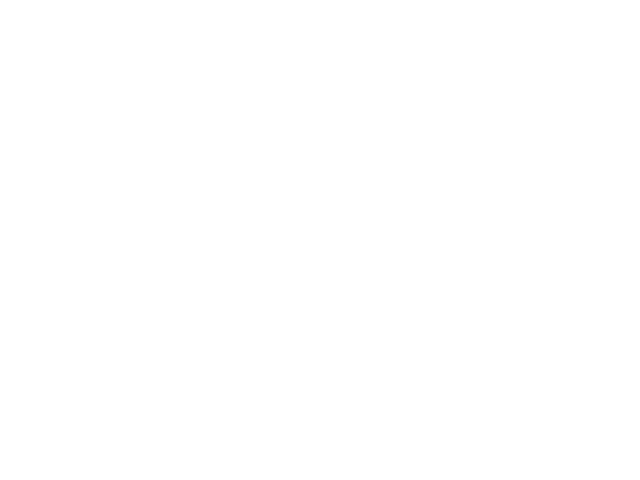

<IPython.core.display.Javascript object>


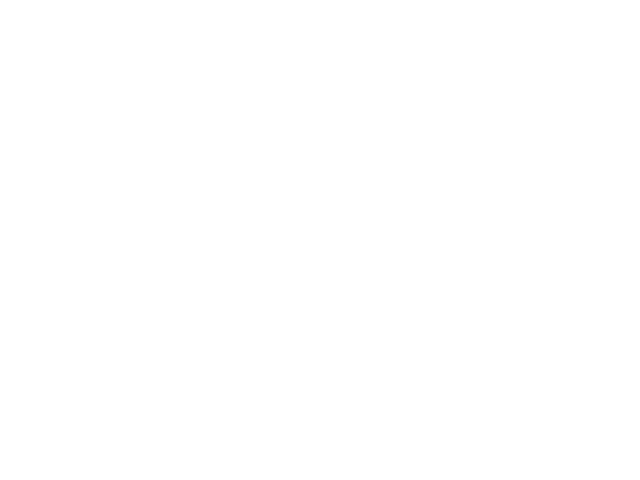

<IPython.core.display.Javascript object>


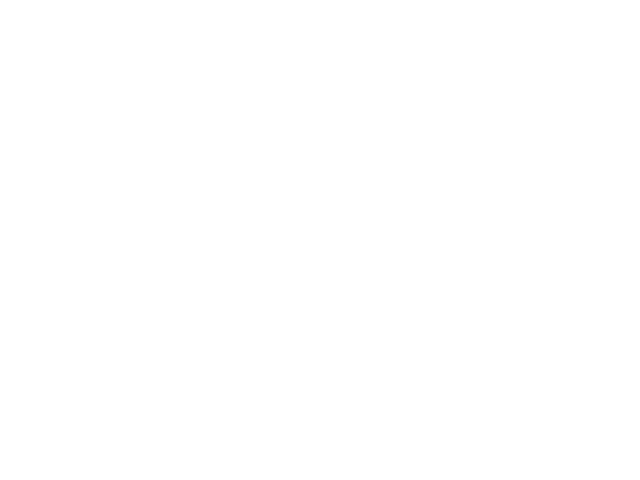

<IPython.core.display.Javascript object>


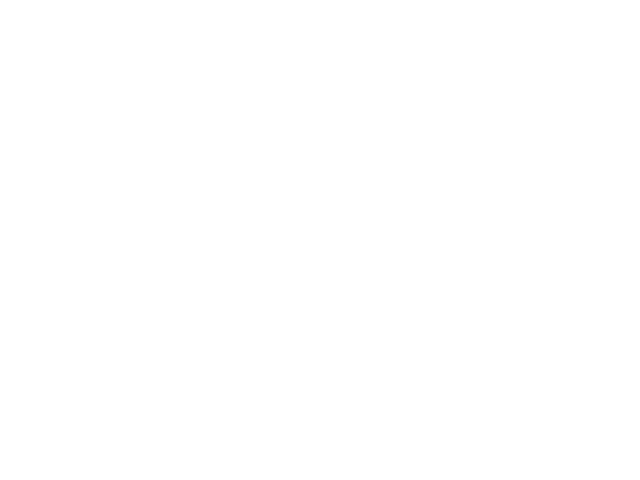

<IPython.core.display.Javascript object>


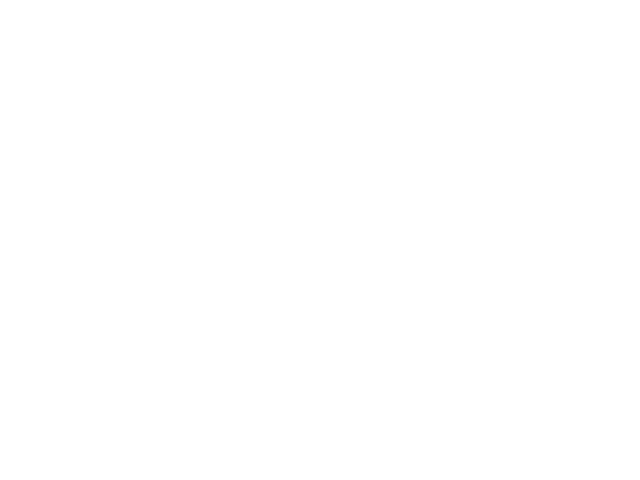

<IPython.core.display.Javascript object>


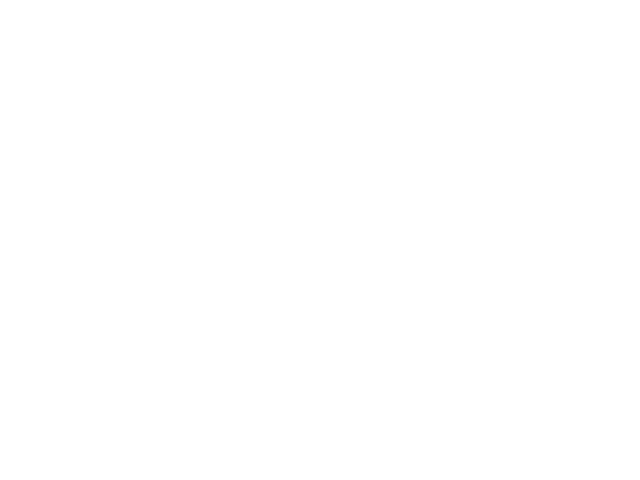

<IPython.core.display.Javascript object>


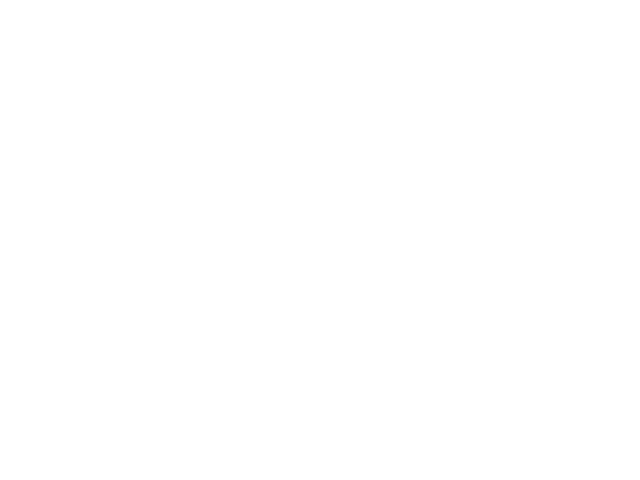

<IPython.core.display.Javascript object>


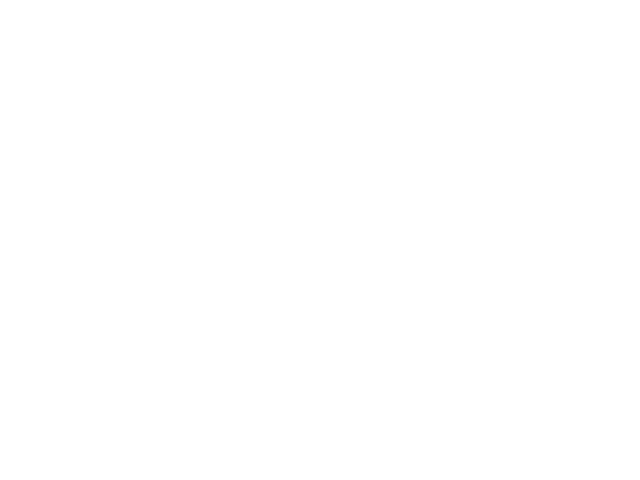

<IPython.core.display.Javascript object>


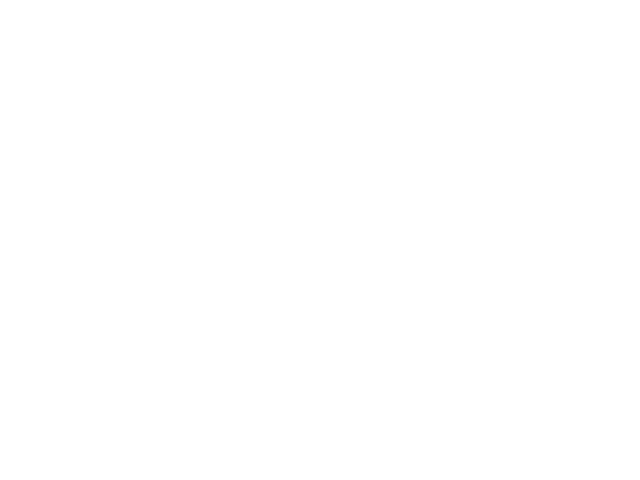

<IPython.core.display.Javascript object>


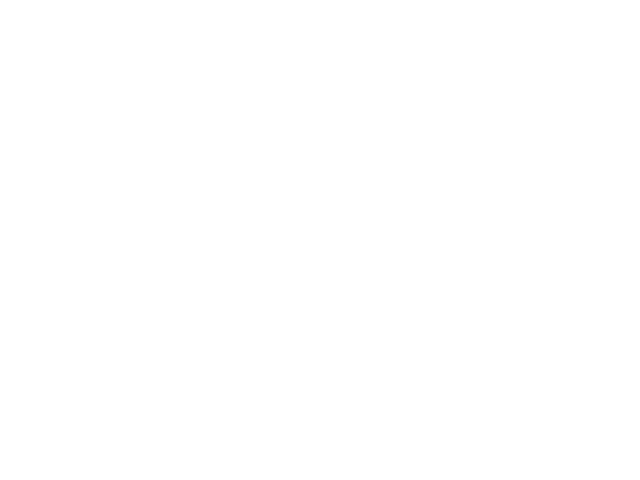

<IPython.core.display.Javascript object>


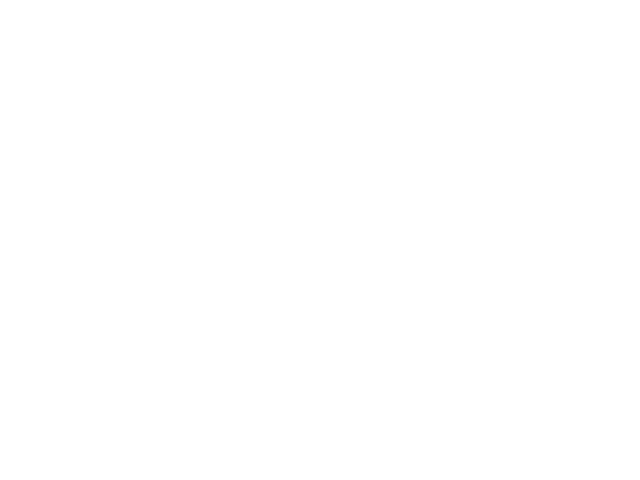

<IPython.core.display.Javascript object>


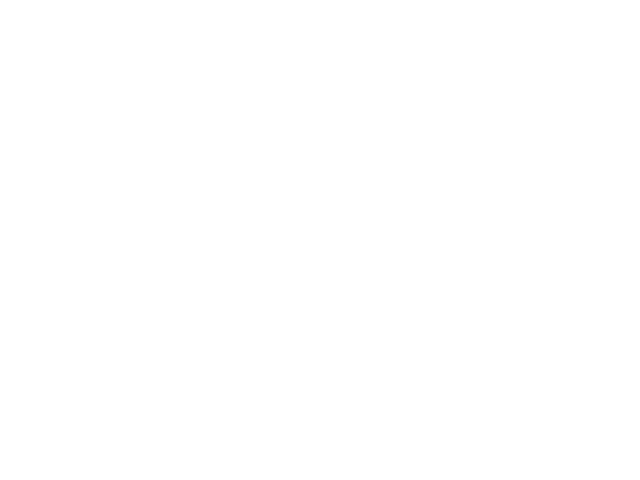

<IPython.core.display.Javascript object>


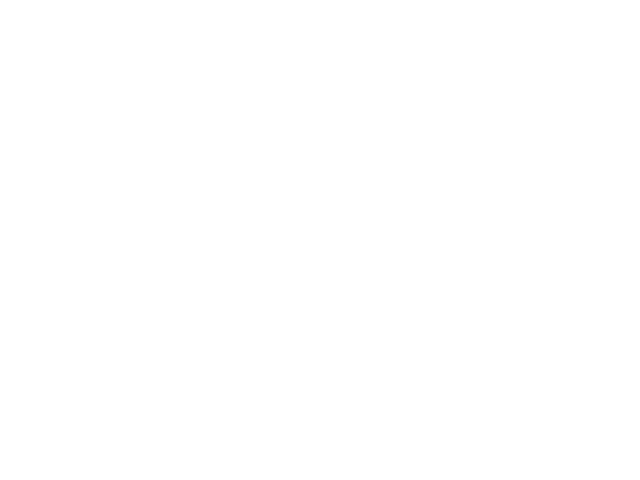

<IPython.core.display.Javascript object>


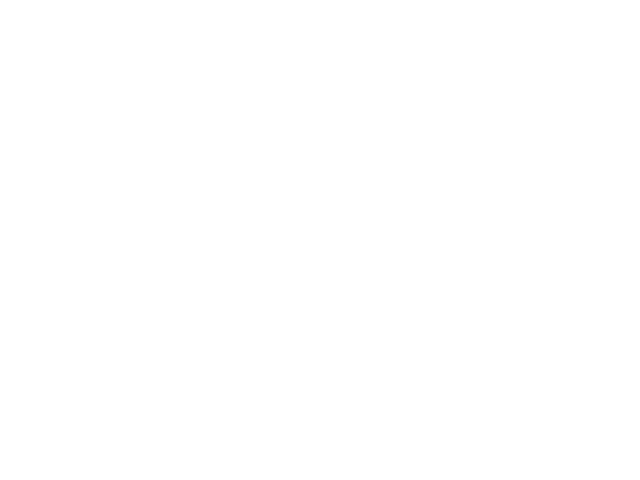

<IPython.core.display.Javascript object>


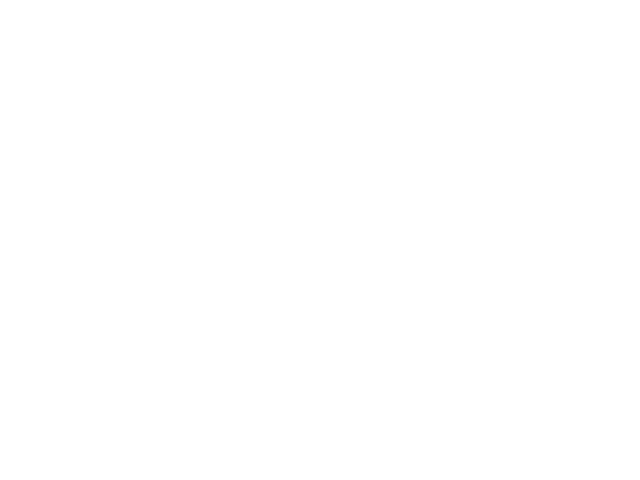

<IPython.core.display.Javascript object>


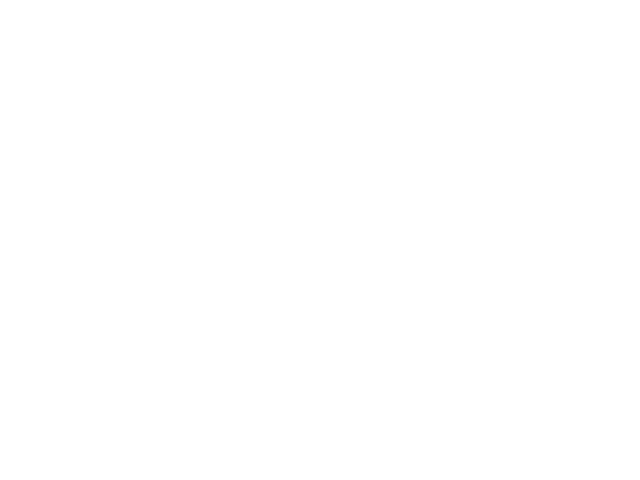

<IPython.core.display.Javascript object>


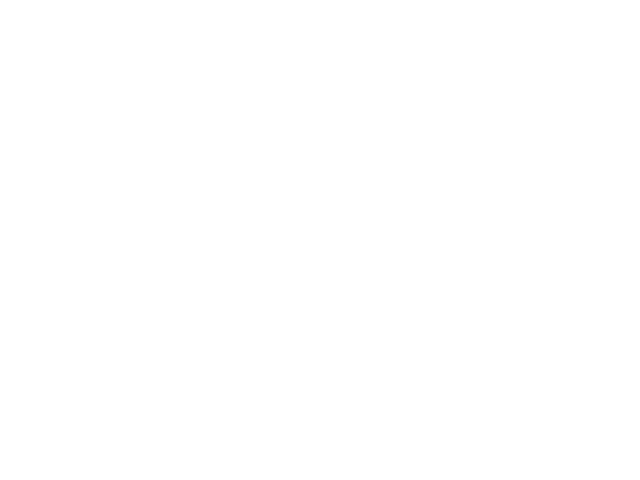

<IPython.core.display.Javascript object>


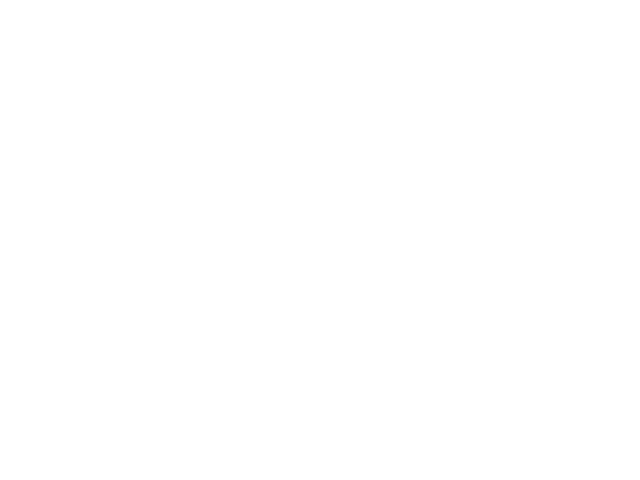

<IPython.core.display.Javascript object>


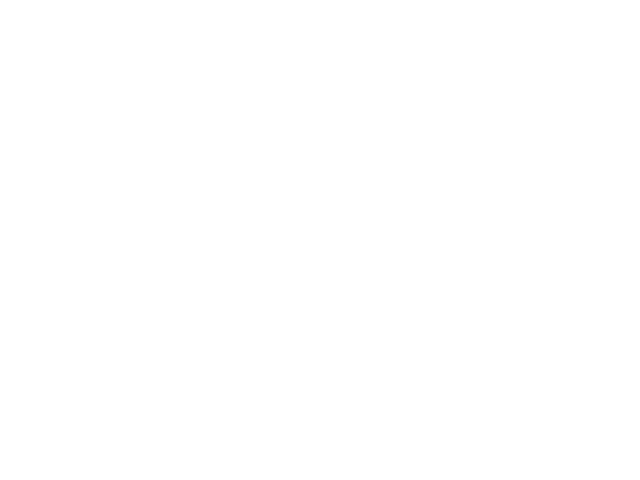

<IPython.core.display.Javascript object>


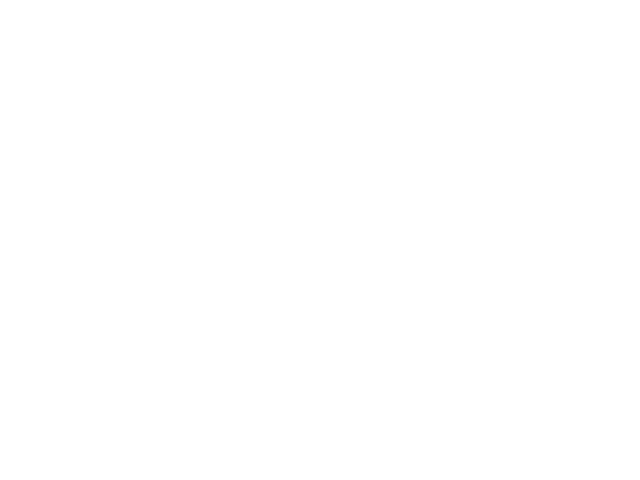

<IPython.core.display.Javascript object>


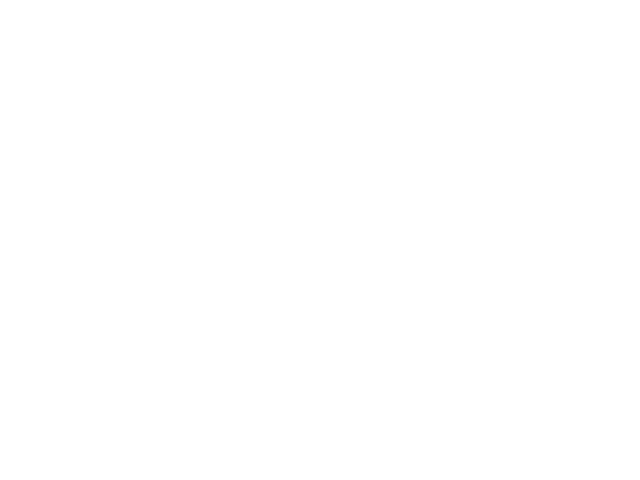

<IPython.core.display.Javascript object>


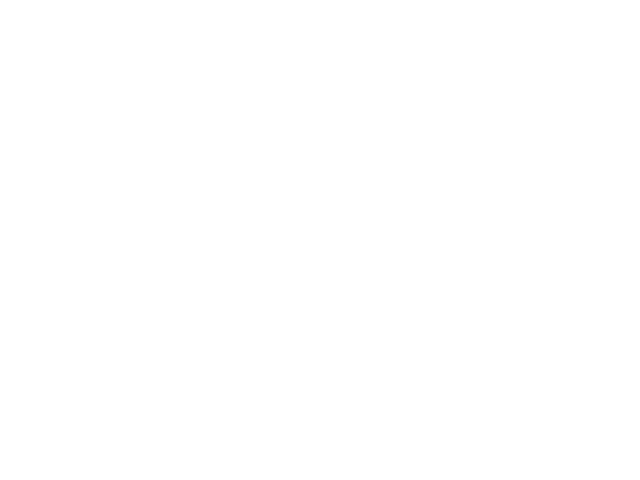

IndexError: index 22 is out of bounds for axis 0 with size 22

In [147]:
print_multipage(Zs[order_by_peak[gd]],plotZs,'ori_responses_on_target')

In [ ]:
np.where(gd)

In [ ]:
def plotalltrials(arr):
    for i in range(8):
        plt.subplot(2,4,i+1)
        plt.ylim(arr.min(),arr.max())
        plt.plot(arr[i].T)

In [ ]:
plotalltrials(Zs[16,0,1])

In [ ]:
plotZs(Zs[16])

<IPython.core.display.Javascript object>


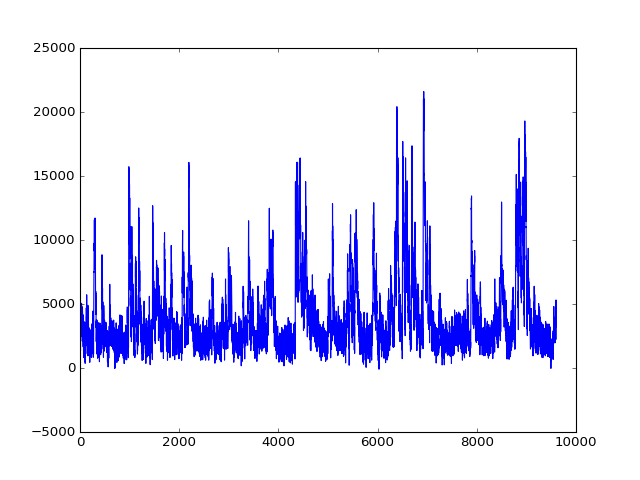

In [129]:
plt.plot(trialwise[8].flatten())

In [ ]:
order_by_peak[gd]

In [ ]:
msk = sio.loadmat('msk.mat')['msk']

In [ ]:
Zsum = Zs.sum(3).sum(3)

In [ ]:
Zsummax = Zsum.max(3)

In [ ]:
Zsummax.reshape((-1,4))[:,:-1].max(1).shape

In [ ]:
bothmax = Zsummax[:,1,1]>2*Zsummax.reshape((-1,4))[:,:-1].max(1)

In [ ]:
figmax = Zsummax[:,1,0]>2*Zsummax.reshape((-1,4))[:,np.array((0,1,3))].max(1)

In [ ]:
groundmax = Zsummax[:,0,1]>2*Zsummax.reshape((-1,4))[:,np.array((0,2,3))].max(1)

<IPython.core.display.Javascript object>


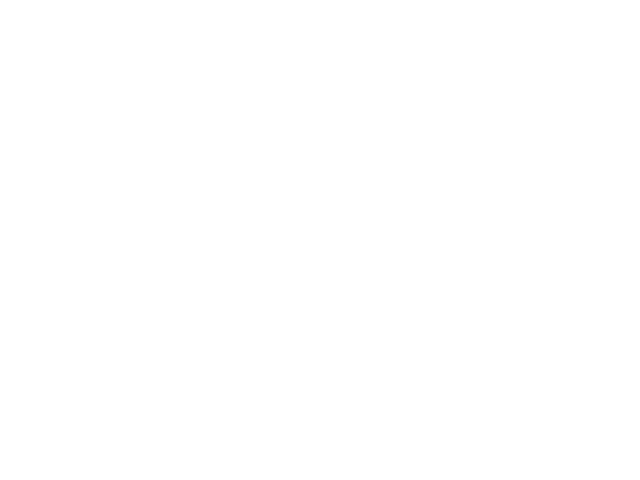

<IPython.core.display.Javascript object>


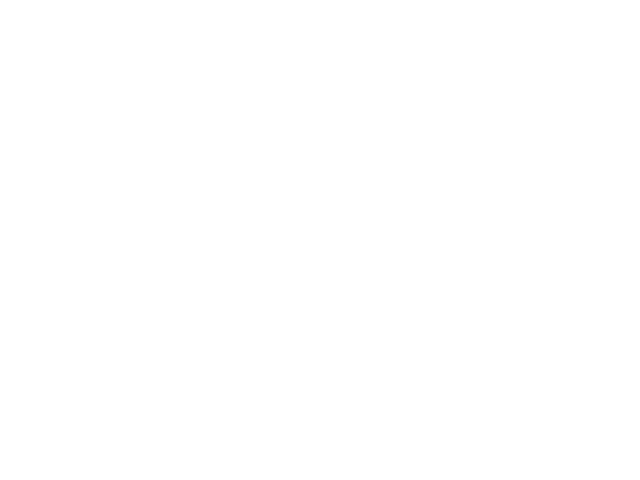

<IPython.core.display.Javascript object>


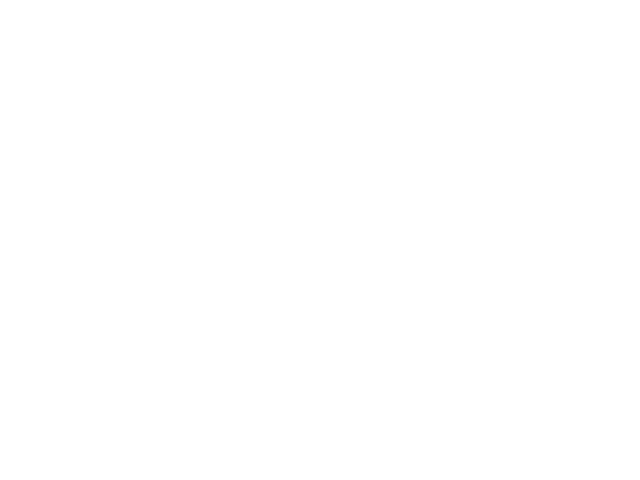

<IPython.core.display.Javascript object>


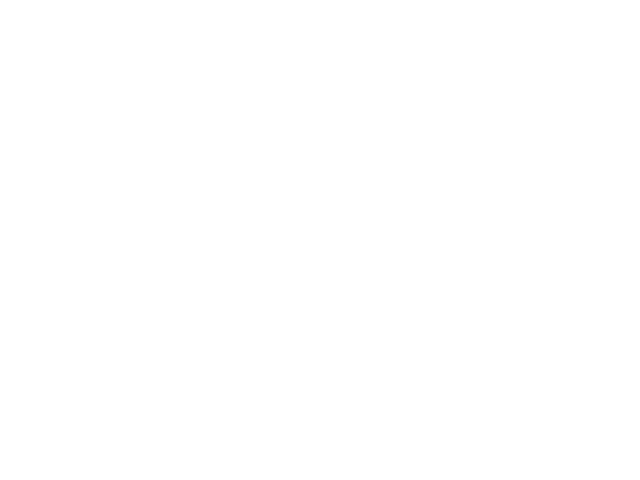

<IPython.core.display.Javascript object>


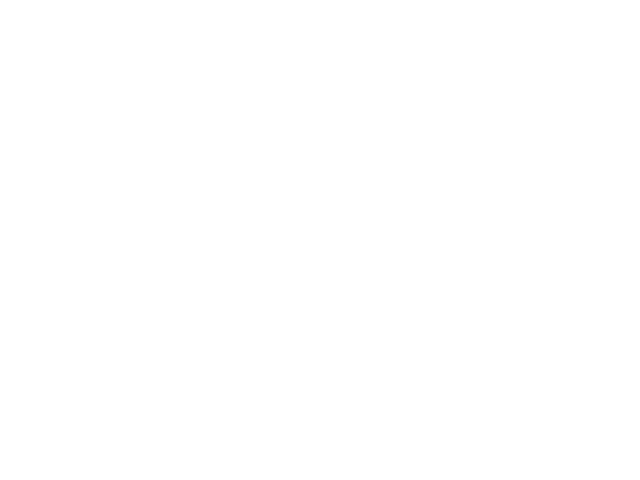

<IPython.core.display.Javascript object>


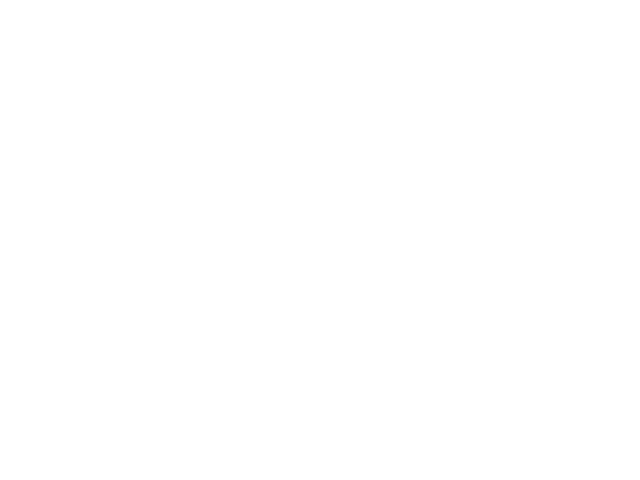

<IPython.core.display.Javascript object>


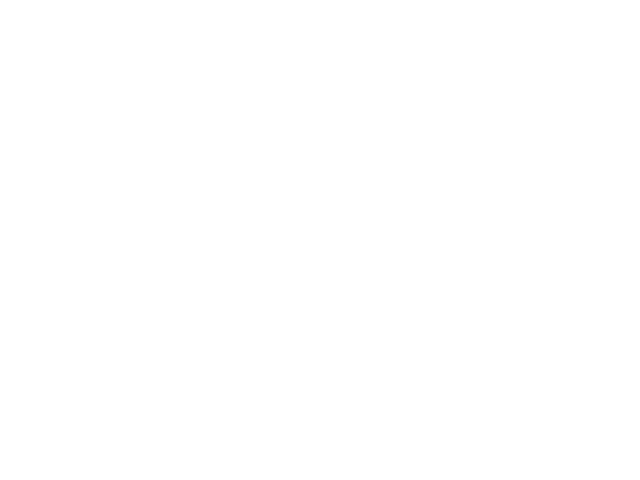

<IPython.core.display.Javascript object>


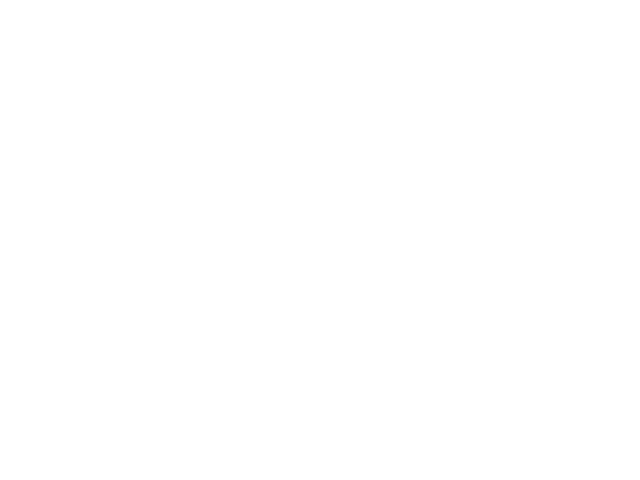

<IPython.core.display.Javascript object>


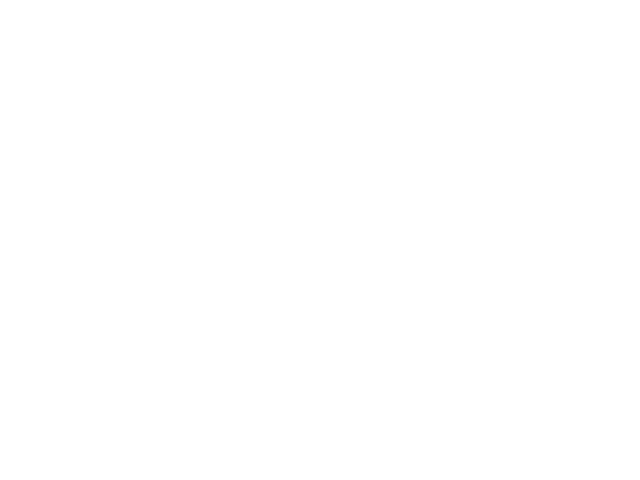

<IPython.core.display.Javascript object>


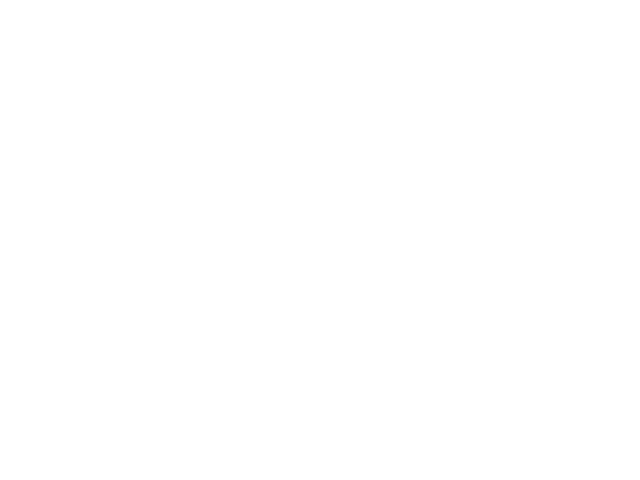

<IPython.core.display.Javascript object>


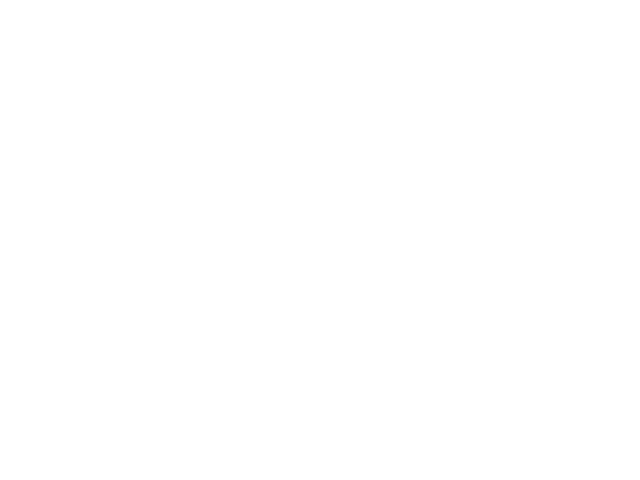

<IPython.core.display.Javascript object>


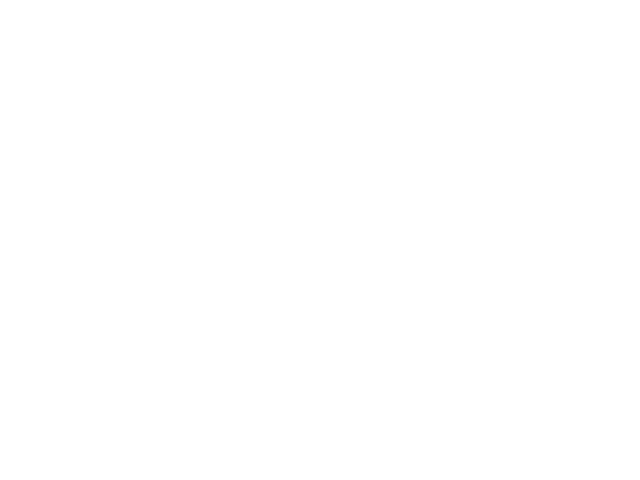

<IPython.core.display.Javascript object>


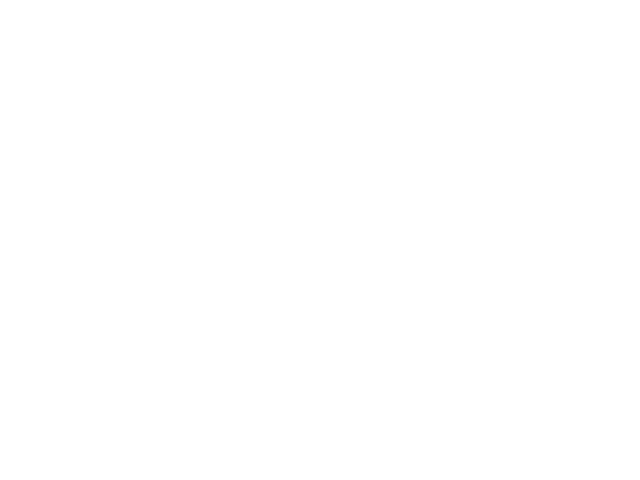

<IPython.core.display.Javascript object>


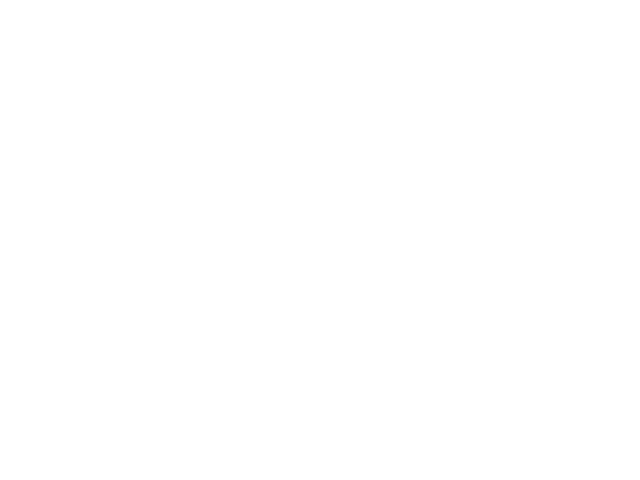

<IPython.core.display.Javascript object>


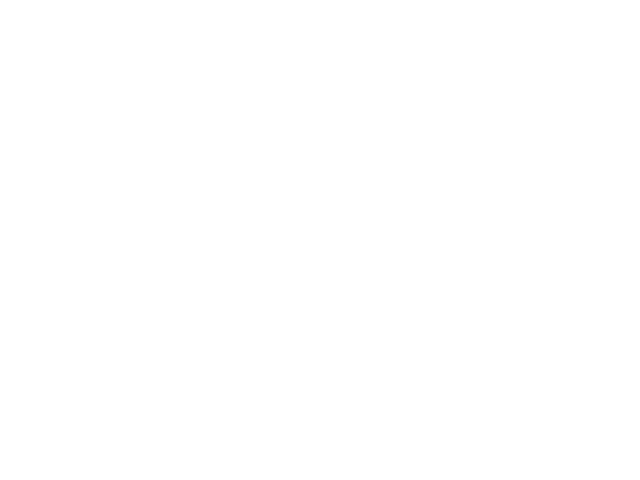

<IPython.core.display.Javascript object>


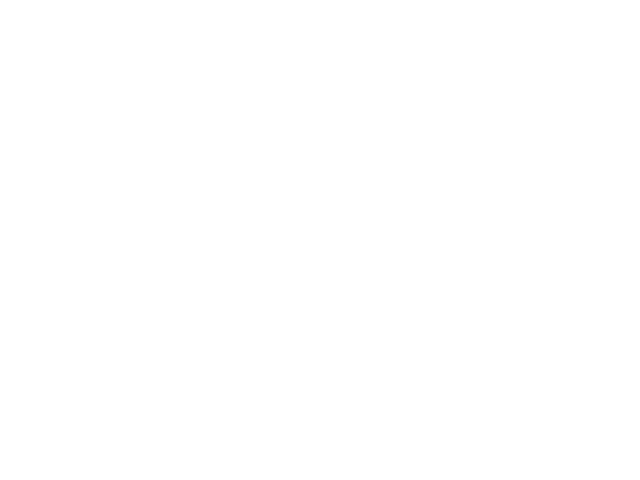

<IPython.core.display.Javascript object>


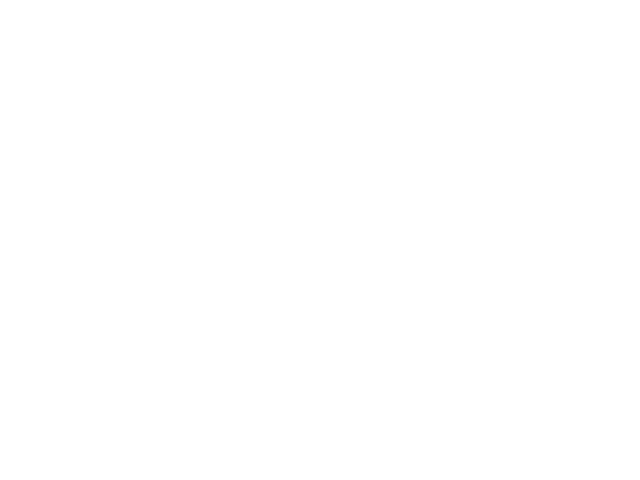

<IPython.core.display.Javascript object>


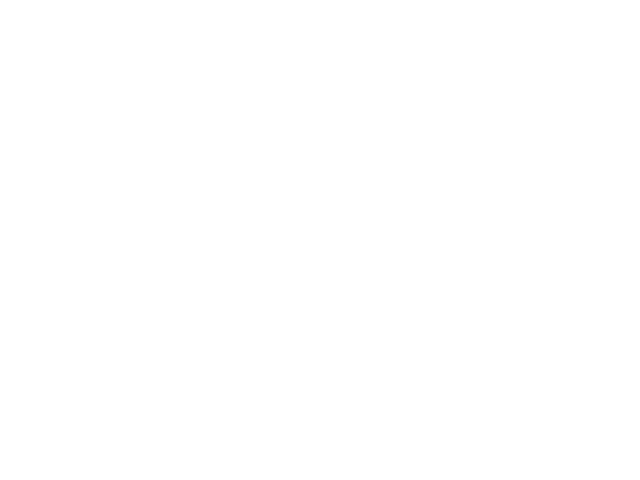

<IPython.core.display.Javascript object>


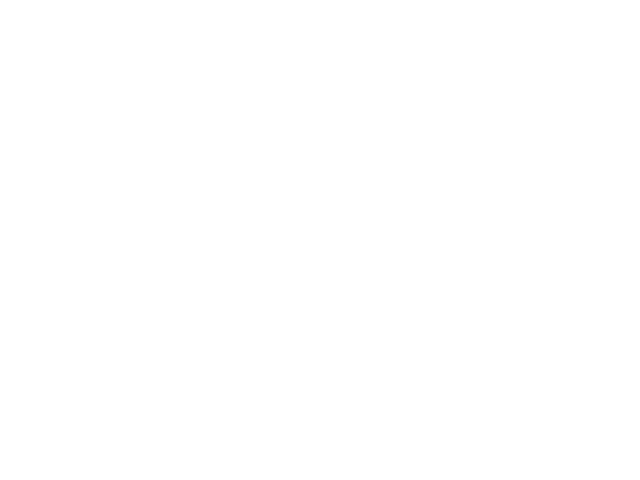

<IPython.core.display.Javascript object>


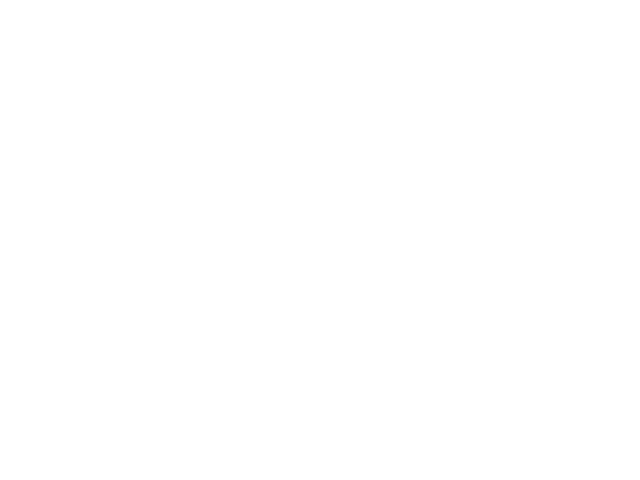

<IPython.core.display.Javascript object>


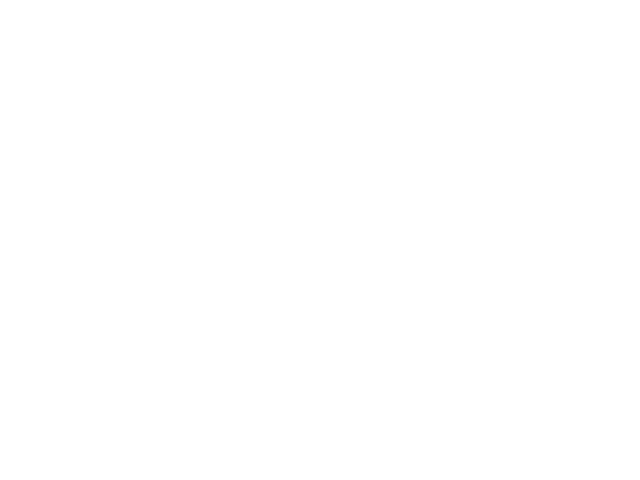

<IPython.core.display.Javascript object>


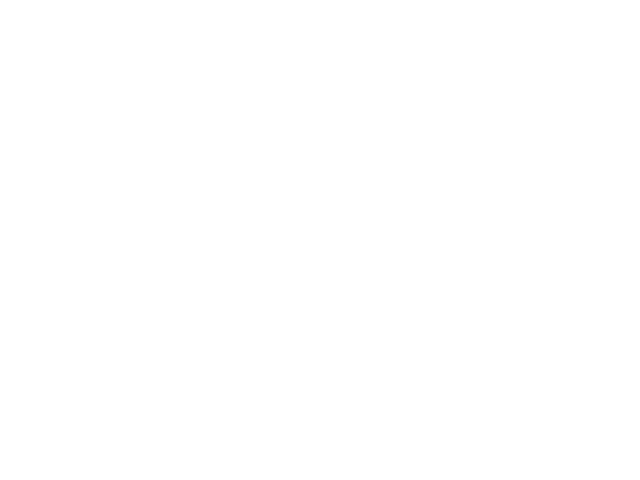

<IPython.core.display.Javascript object>


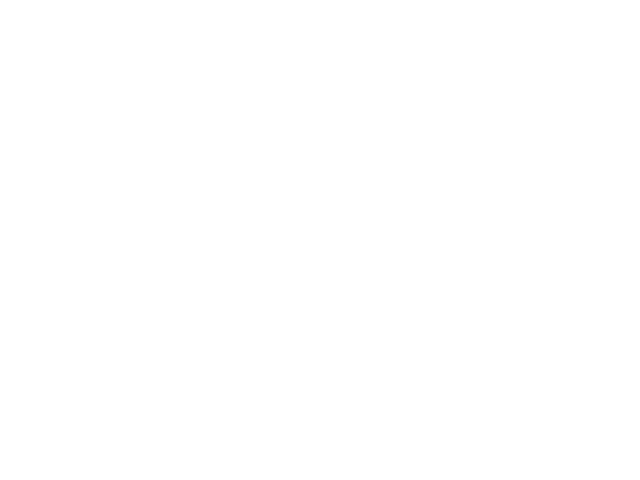

<IPython.core.display.Javascript object>


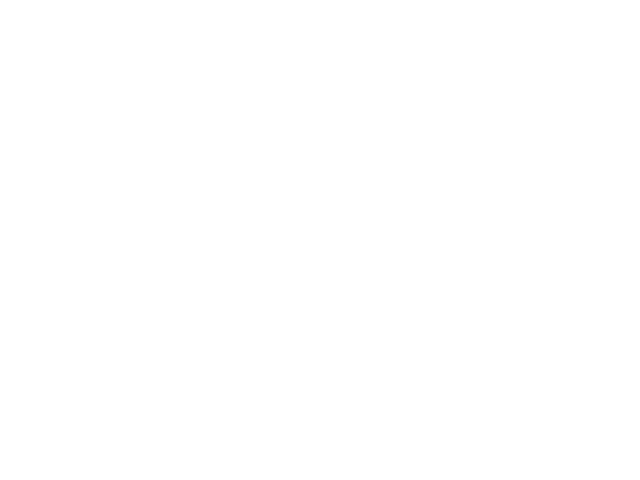

<IPython.core.display.Javascript object>


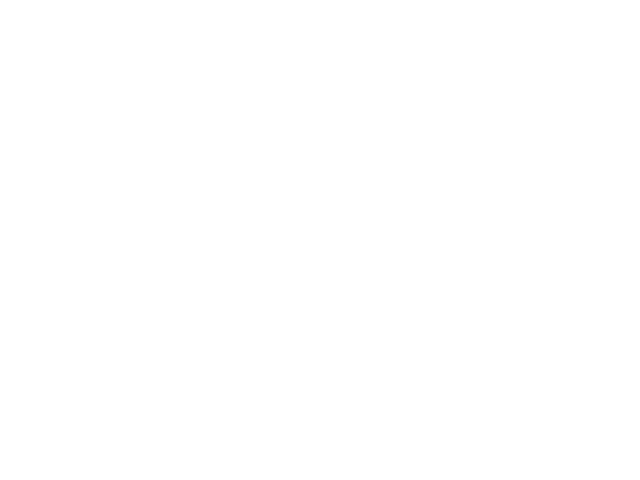

<IPython.core.display.Javascript object>


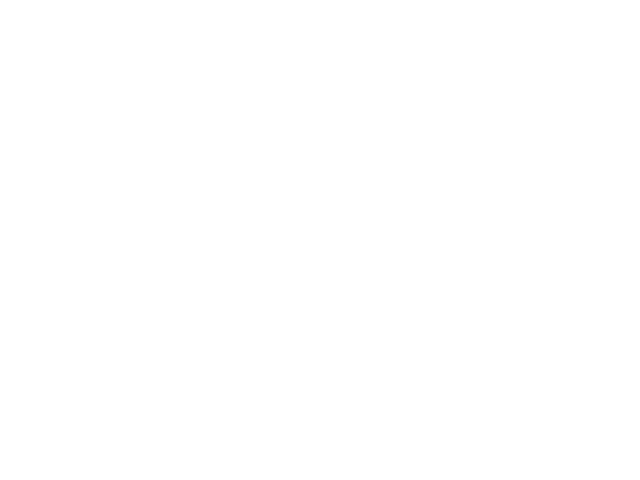

<IPython.core.display.Javascript object>


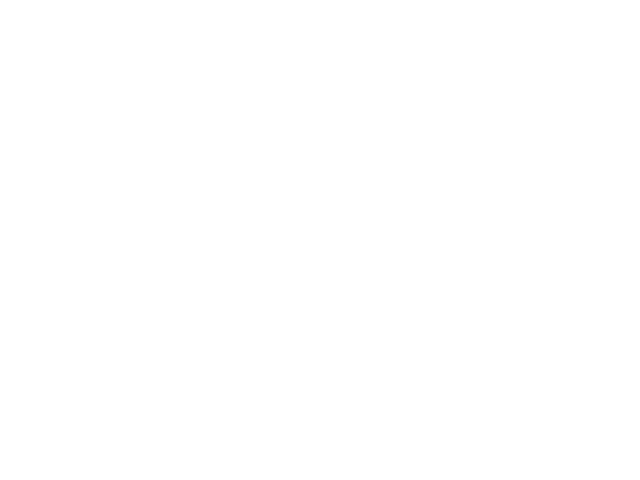

<IPython.core.display.Javascript object>


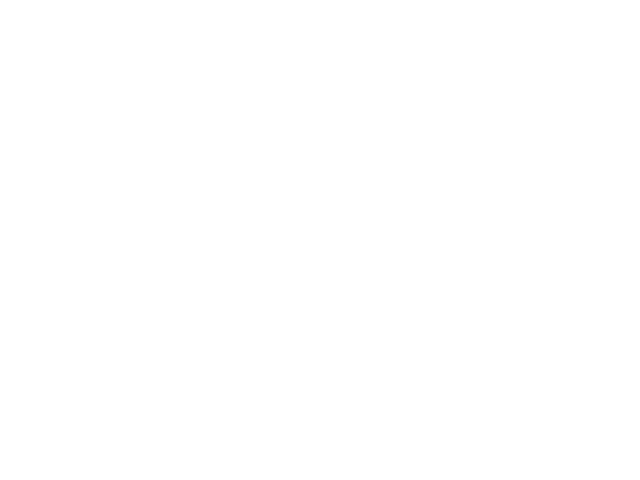

<IPython.core.display.Javascript object>


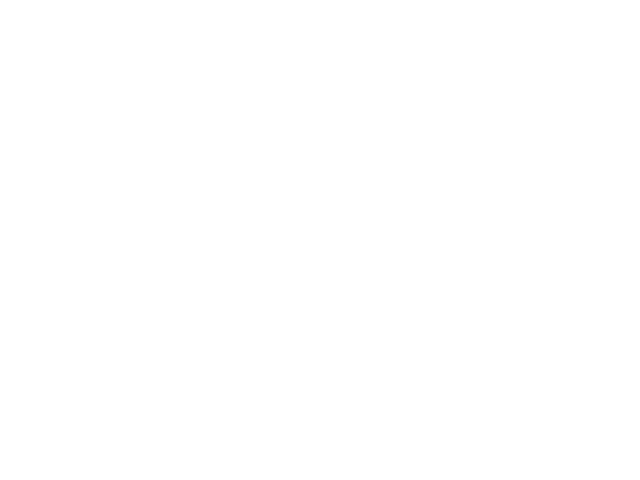

<IPython.core.display.Javascript object>


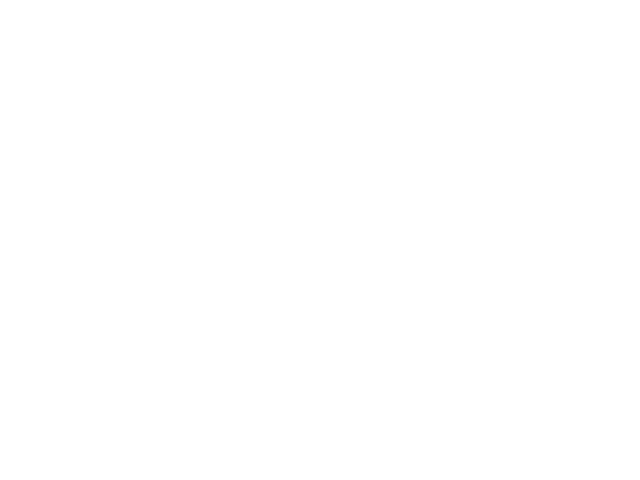

<IPython.core.display.Javascript object>


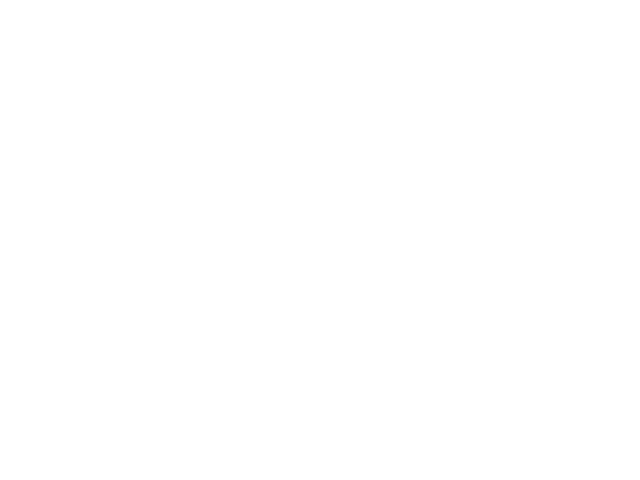

<IPython.core.display.Javascript object>


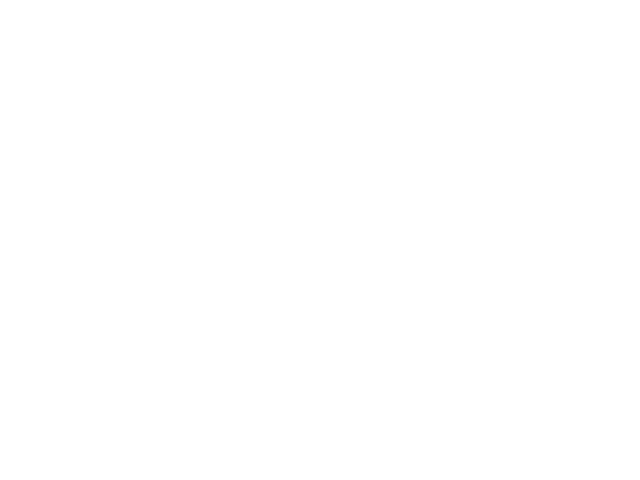

<IPython.core.display.Javascript object>


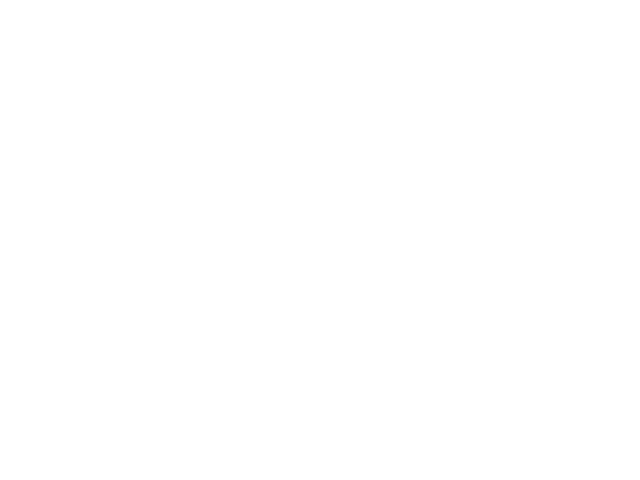

<IPython.core.display.Javascript object>


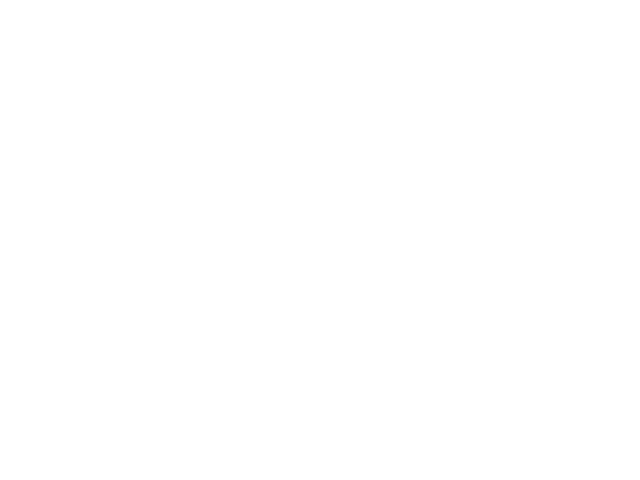

<IPython.core.display.Javascript object>


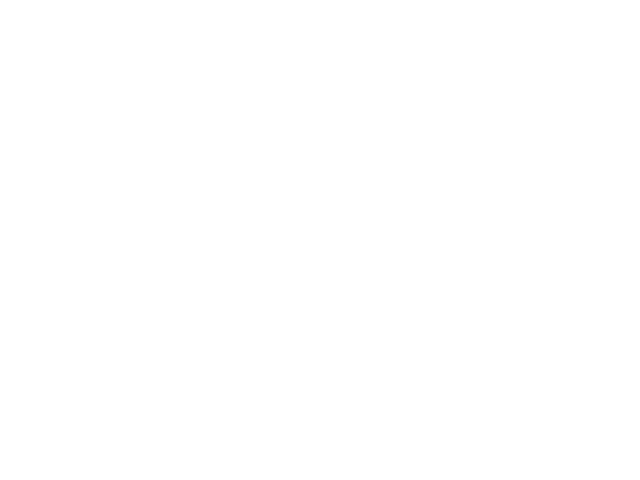

<IPython.core.display.Javascript object>


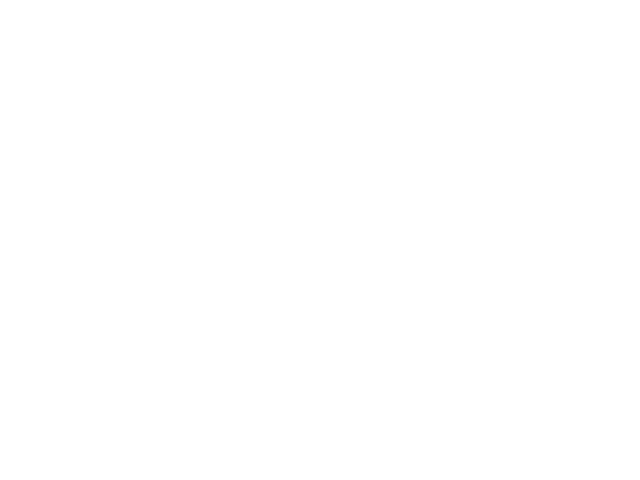

<IPython.core.display.Javascript object>


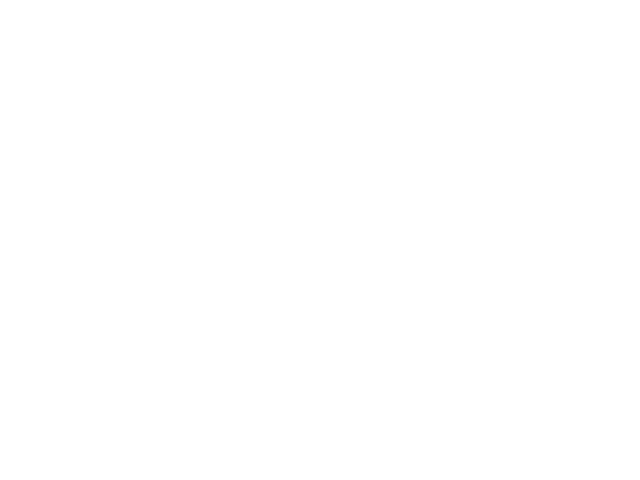

<IPython.core.display.Javascript object>


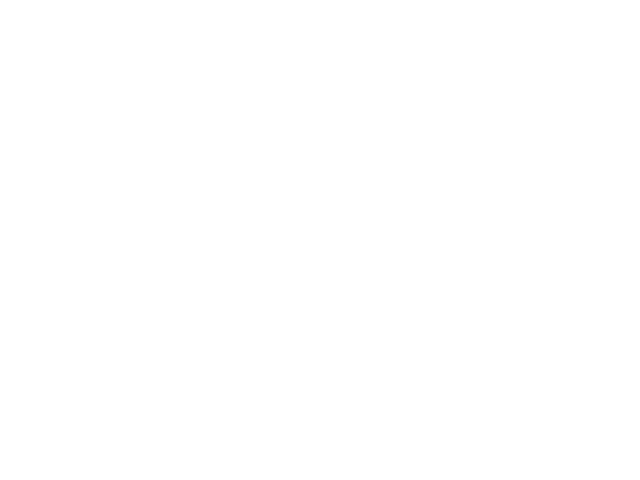

<IPython.core.display.Javascript object>


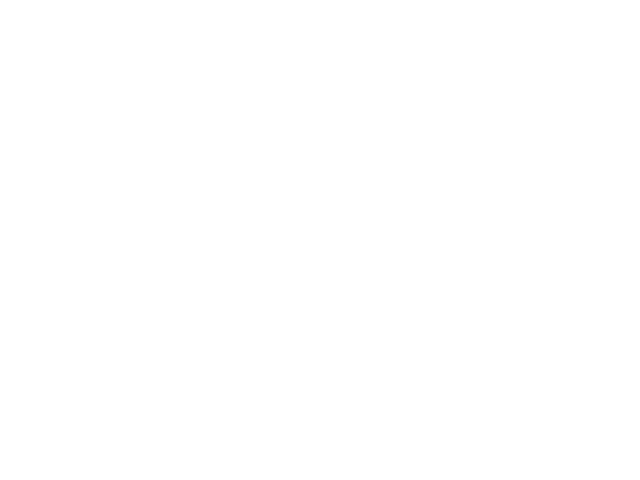

<IPython.core.display.Javascript object>


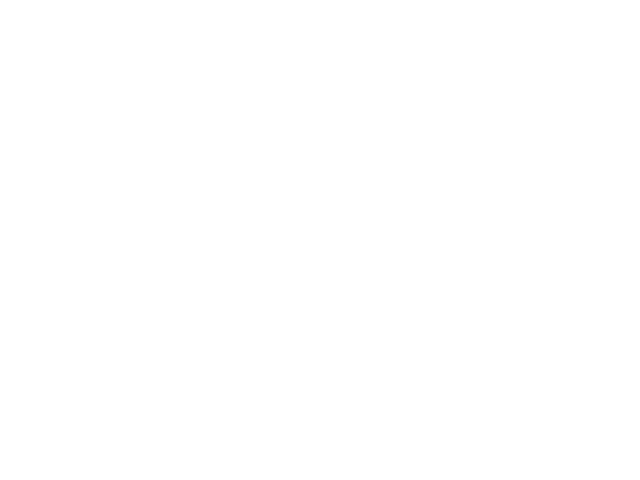

<IPython.core.display.Javascript object>


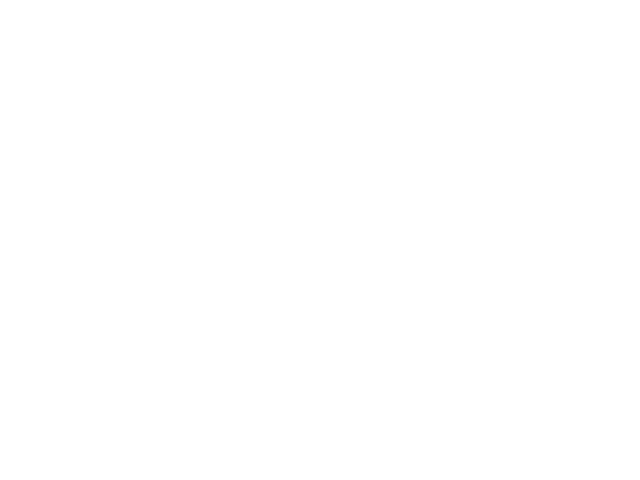

In [55]:
print_multipage(t,Zs[np.logical_or(figmax,groundmax)],plotZs,'ori_responses_fg_suppressed')

<IPython.core.display.Javascript object>


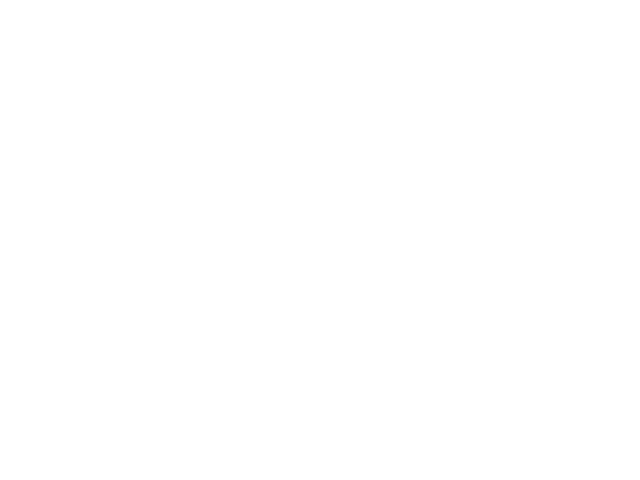

<IPython.core.display.Javascript object>


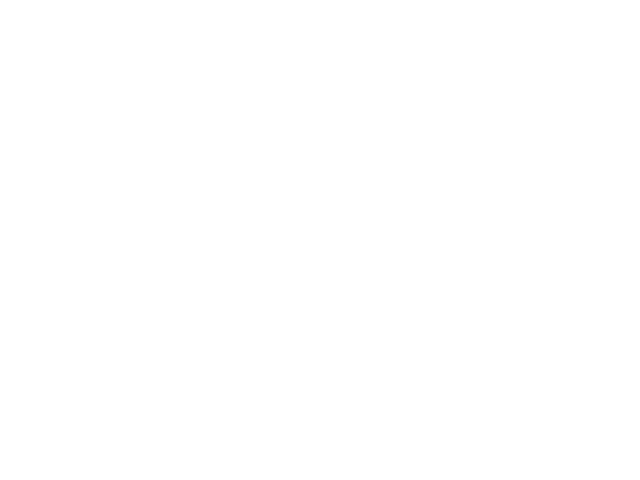

<IPython.core.display.Javascript object>


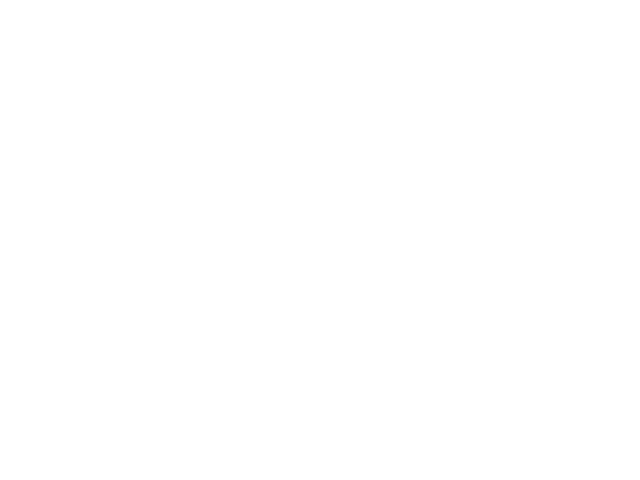

<IPython.core.display.Javascript object>


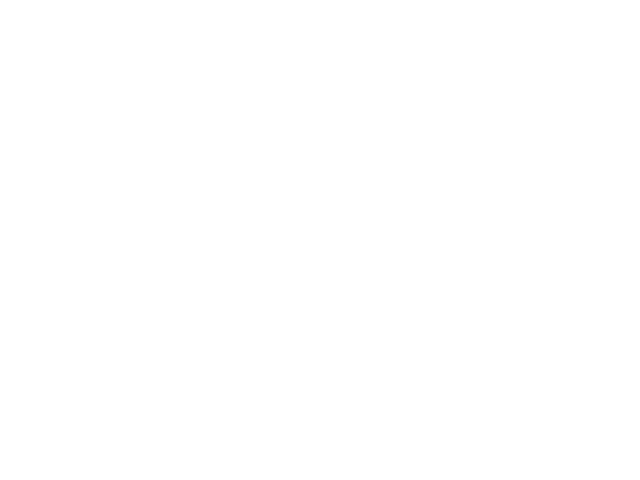

<IPython.core.display.Javascript object>


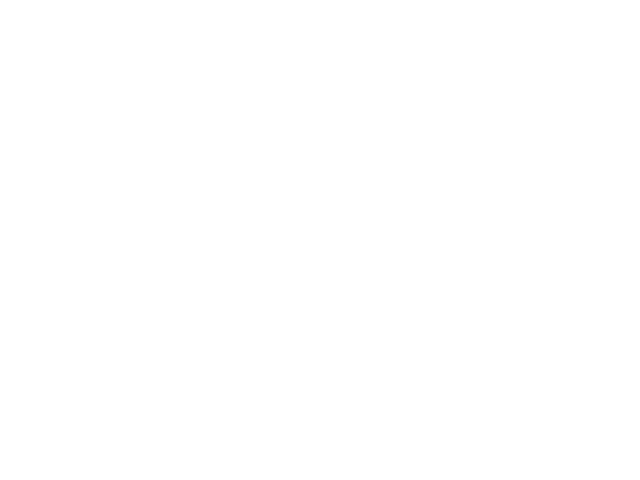

<IPython.core.display.Javascript object>


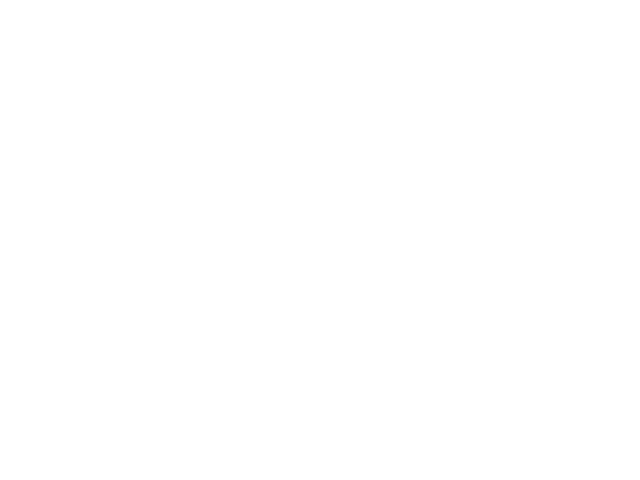

<IPython.core.display.Javascript object>


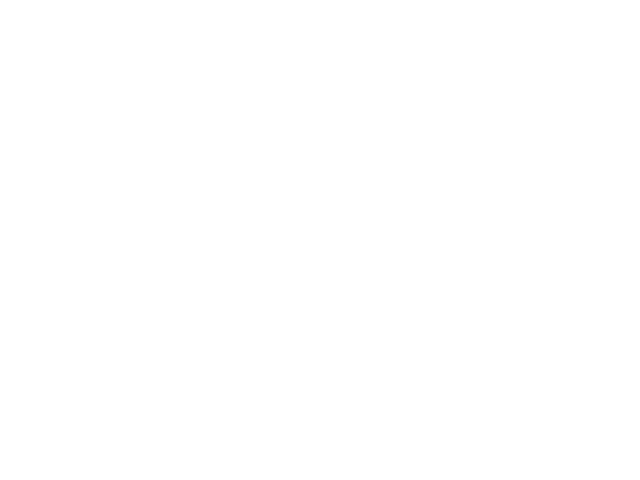

<IPython.core.display.Javascript object>


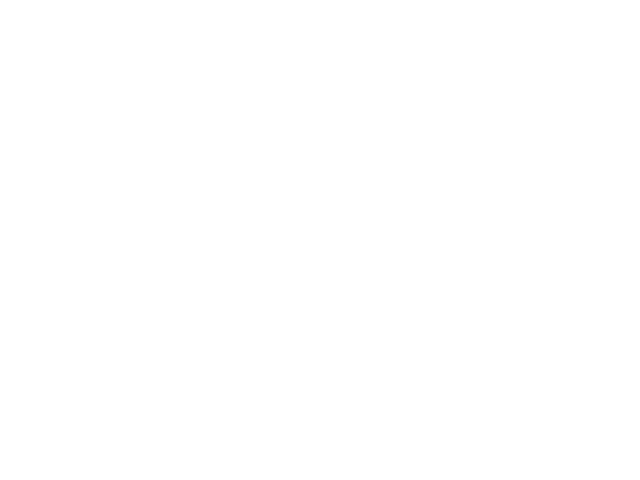

<IPython.core.display.Javascript object>


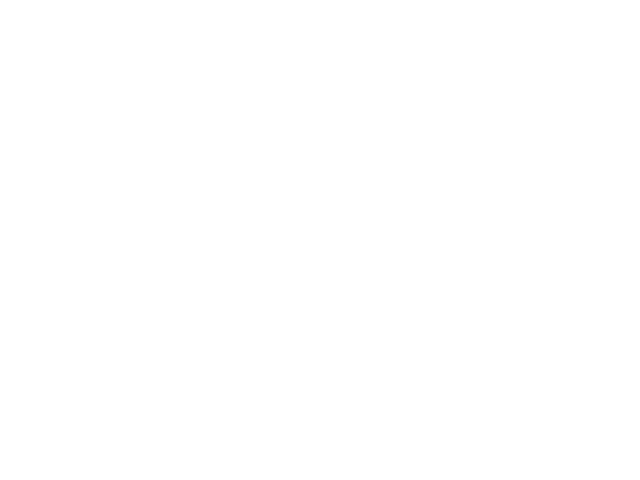

<IPython.core.display.Javascript object>


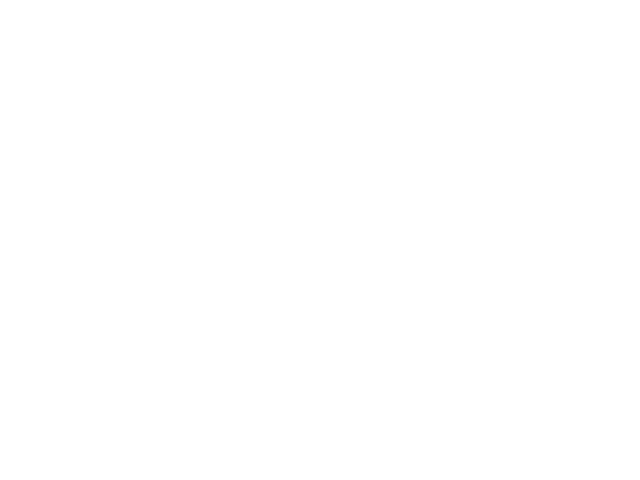

<IPython.core.display.Javascript object>


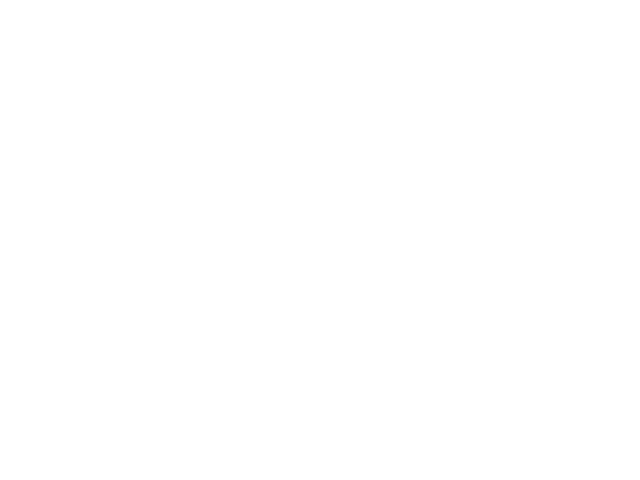

<IPython.core.display.Javascript object>


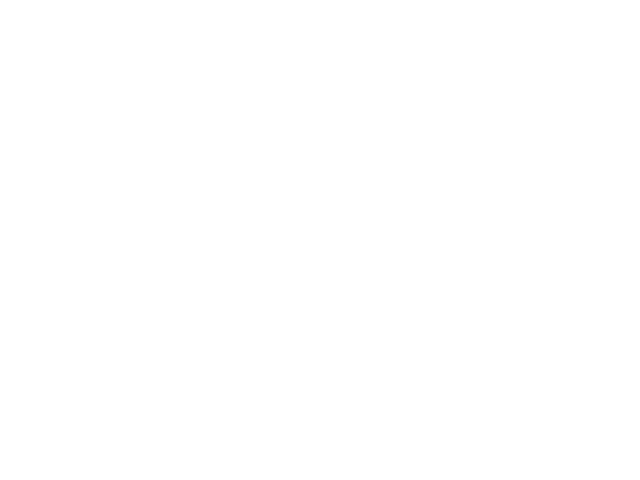

<IPython.core.display.Javascript object>


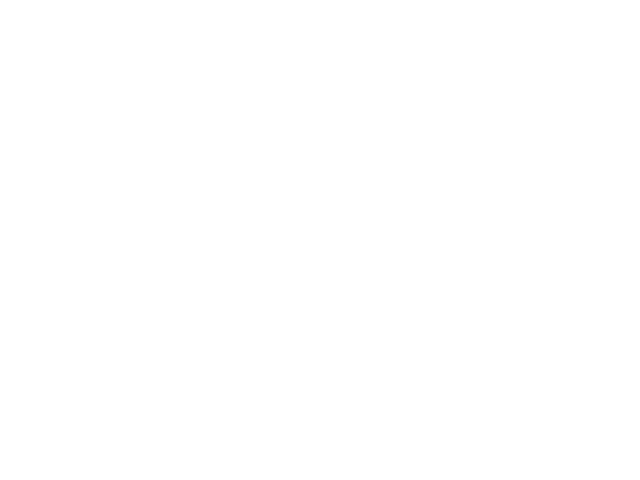

<IPython.core.display.Javascript object>


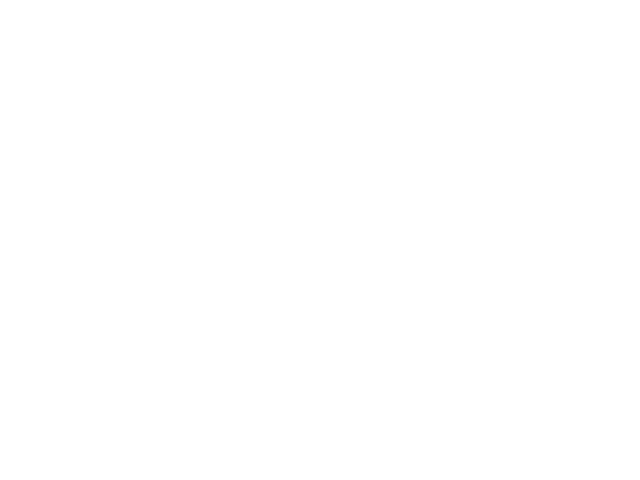

<IPython.core.display.Javascript object>


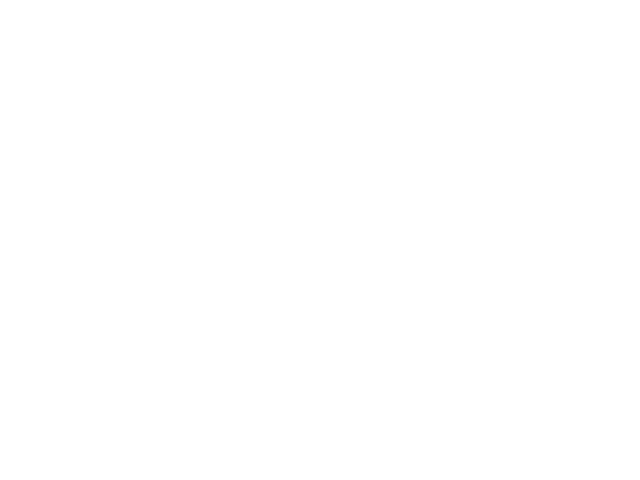

In [56]:
print_multipage(t,Zs[bothmax],plotZs,'ori_responses_fg_facilitated')

In [ ]:
figure_only = np.logical_and(2*Zs[:,0,0].mean(1).mean(1).max(1)>Zs[:,0,1].mean(1).mean(1).max(1),2*Zs[:,0,0].mean(1).mean(1).max(1)<Zs[:,1,0].mean(1).mean(1).max(1))
ground_only = np.logical_and(2*Zs[:,0,0].mean(1).mean(1).max(1)<Zs[:,0,1].mean(1).mean(1).max(1),2*Zs[:,0,0].mean(1).mean(1).max(1)>Zs[:,1,0].mean(1).mean(1).max(1))
figure_only = np.logical_and(2*Zs[:,0,0].mean(1).mean(1).max(1)>Zs[:,0,1].mean(1).mean(1).max(1),2*Zs[:,0,0].mean(1).mean(1).max(1)<Zs[:,1,0].mean(1).mean(1).max(1))
non_responsive = np.logical_and(2*Zs[:,0,0].mean(1).mean(1).max(1)>Zs[:,0,1].mean(1).mean(1).max(1),2*Zs[:,0,0].mean(1).mean(1).max(1)>Zs[:,1,0].mean(1).mean(1).max(1))
both_only = np.logical_and(non_responsive,2*Zs[:,0,0].mean(1).mean(1).max(1)<Zs[:,1,1].mean(1).mean(1).max(1))

In [ ]:
plt.subplot(1,3,1)
plt.imshow(msk.sum(0))
plt.subplot(1,3,2)
plt.imshow(msk[non_responsive].sum(0))
plt.subplot(1,3,3)
plt.imshow(msk[figure_only].sum(0)+2*msk[ground_only].sum(0)+3*msk[both_only].sum(0))

In [ ]:
Zsmeansub = Zs-Zs.mean(4)[:,:,:,:,np.newaxis,:]

In [ ]:
zs.shape

In [ ]:
Ccalcium = np.corrcoef(zs.reshape(zs.shape[0],-1))

In [ ]:
km = skc.KMeans(n_clusters=5).fit(Ccalcium)

In [ ]:
Cnoise = np.corrcoef(Zsmeansub.reshape((Zsmeansub.shape[0],-1)))

In [ ]:
import sklearn.cluster as skc

In [ ]:
km = skc.KMeans(n_clusters=2).fit(Ccalcium)

In [ ]:
plt.imshow(Ccalcium[np.argsort(km.labels_),:][:, np.argsort(km.labels_)],interpolation='nearest')

<IPython.core.display.Javascript object>


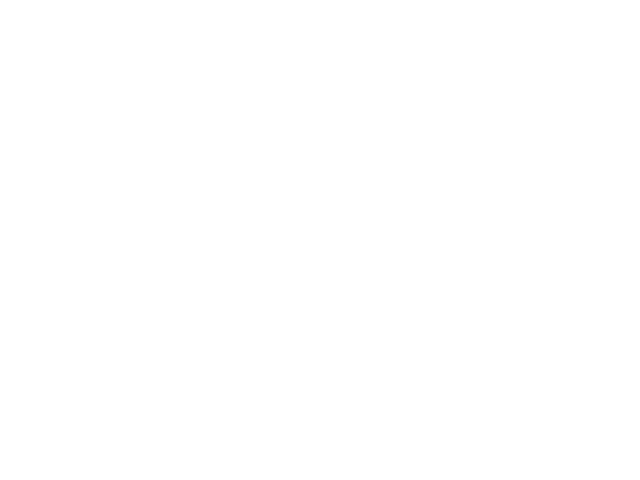

<IPython.core.display.Javascript object>


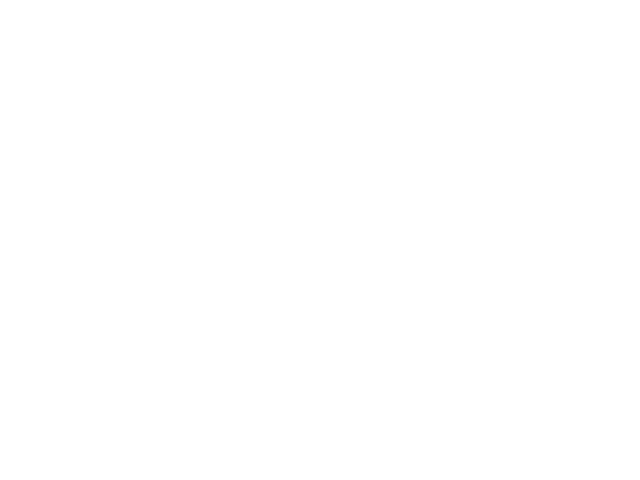

<IPython.core.display.Javascript object>


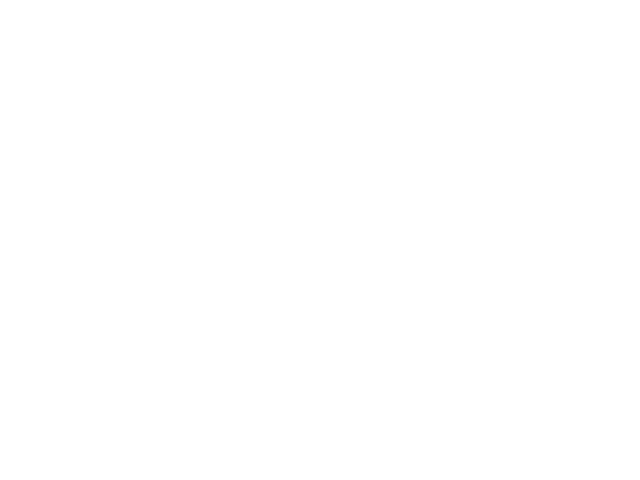

<IPython.core.display.Javascript object>


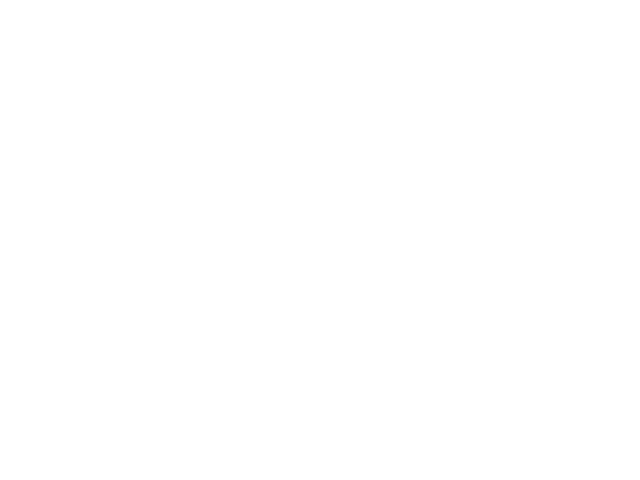

<IPython.core.display.Javascript object>


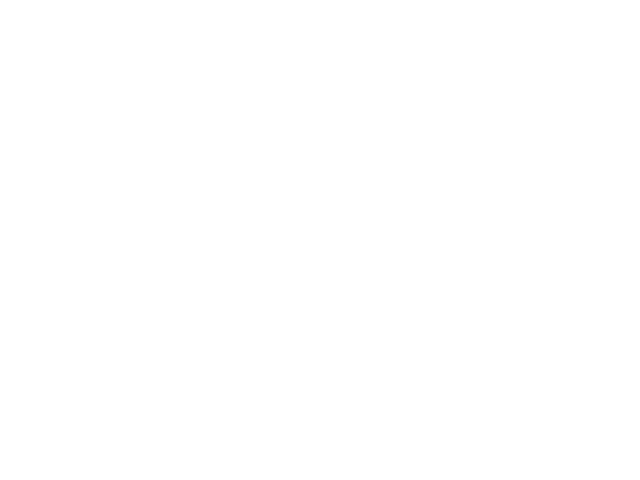

<IPython.core.display.Javascript object>


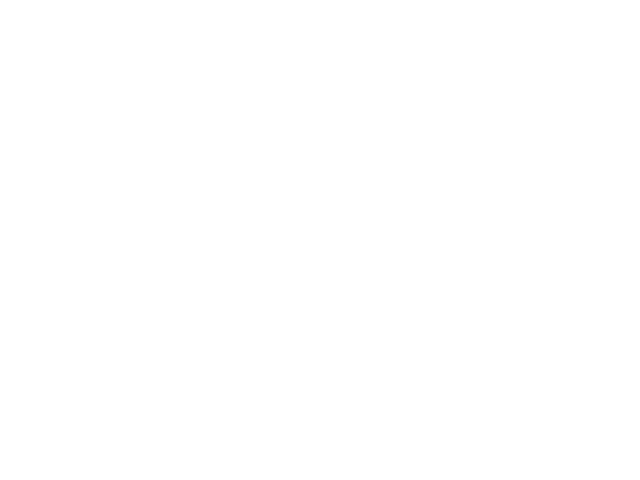

<IPython.core.display.Javascript object>


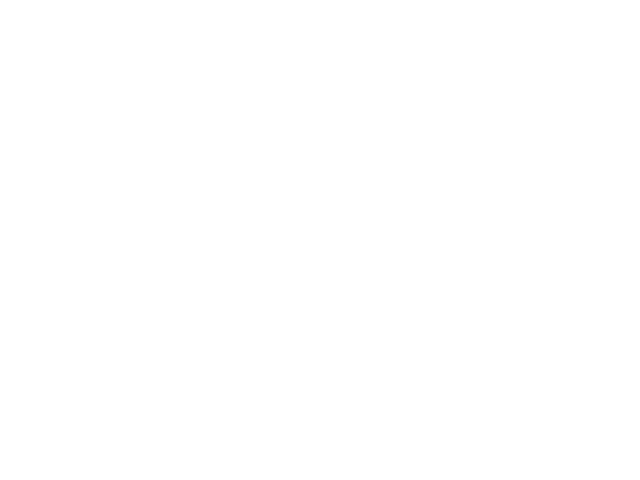

<IPython.core.display.Javascript object>


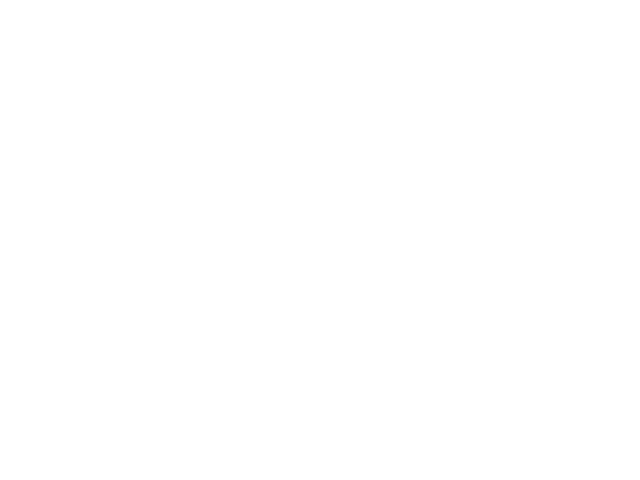

<IPython.core.display.Javascript object>


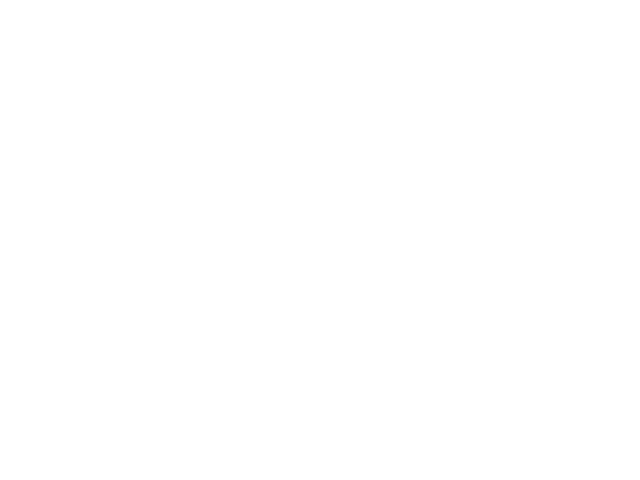

<IPython.core.display.Javascript object>


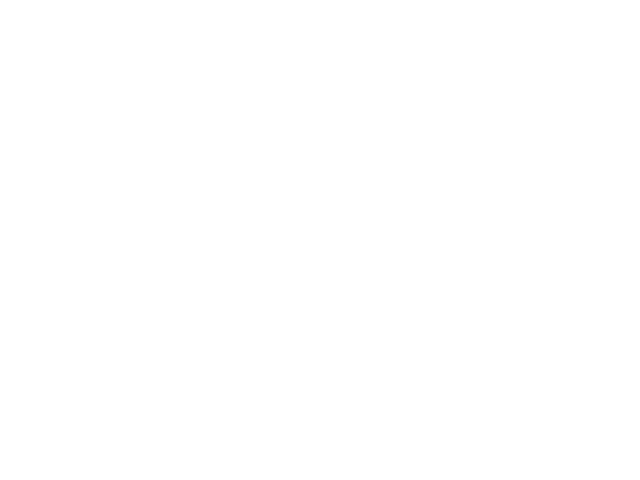

<IPython.core.display.Javascript object>


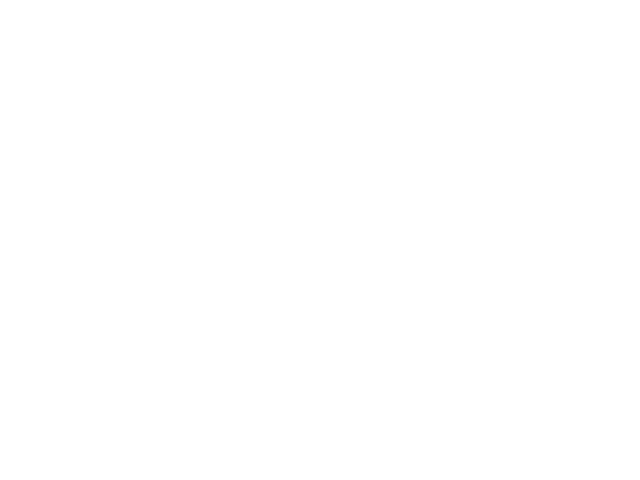

<IPython.core.display.Javascript object>


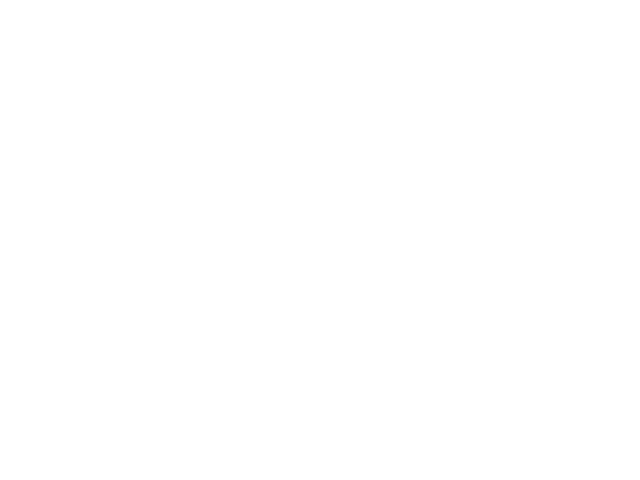

<IPython.core.display.Javascript object>


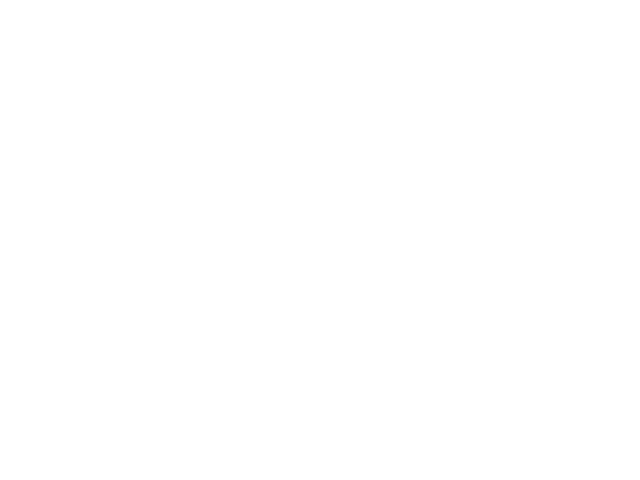

<IPython.core.display.Javascript object>


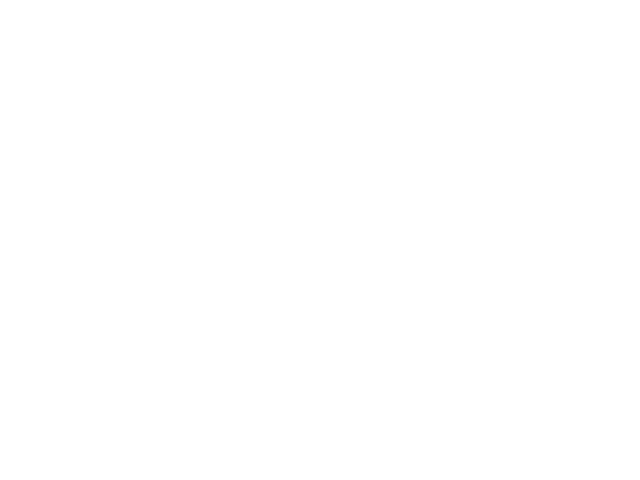

<IPython.core.display.Javascript object>


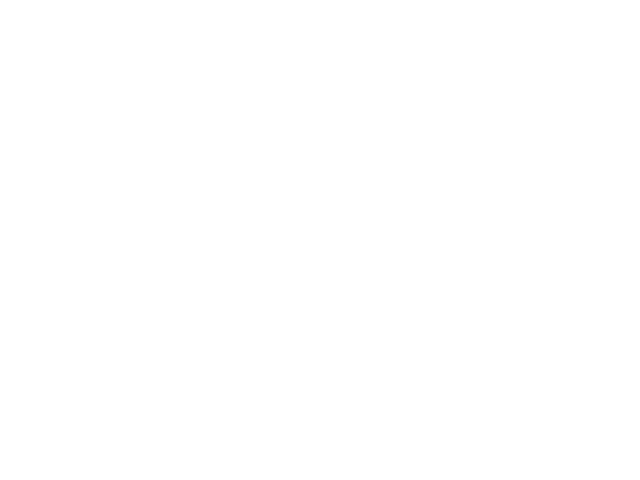

IndexError: index 15 is out of bounds for axis 0 with size 15

In [243]:
print_multipage(Zs[km.labels_==2],plotZs,'cluster2')

<IPython.core.display.Javascript object>


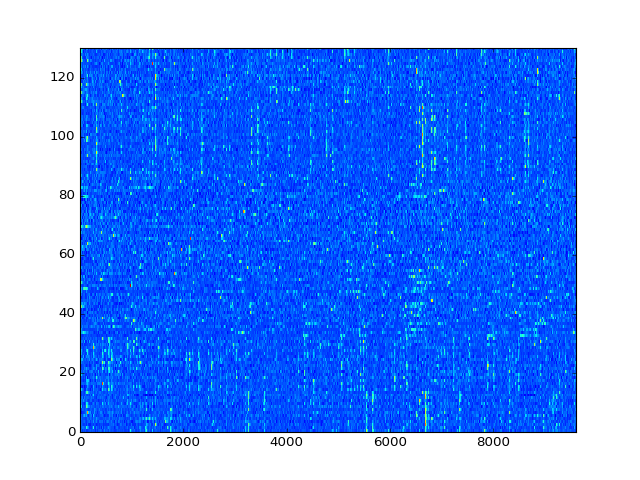

In [272]:
# arr = zs[km.labels_==2].reshape((km.labels_==2).sum(),-1)
arr = zs[np.argsort(km.labels_)].reshape(len(km.labels_),-1)
plt.imshow(arr,extent=[0,arr.shape[1],0,arr.shape[0]],aspect='auto',interpolation='nearest')

In [1]:
from sync_running_data import get_run_signal

In [248]:
get_run_signal()

(130, 160, 60)